<center>
<h2>Data Science Lab on Smart Cities</h2>
<i>Mobility in Northern Sardinia</i>
</center>

In [1]:
# imports

import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import os

<center>
<h4><b>Data Exploration & Data Pre-Processing</b></h4>
</center>

Provincia di Sassari

- 92 Comuni
- 474.142 Abitanti
- 7.701,76 km²

**Geo Limits**

In [2]:
# explore ISTAT data
os.listdir('../data/raw/Limiti01012023')

['Com01012023', 'ProvCM01012023', 'Reg01012023', 'RipGeo01012023']

<center><i>Provinces</center></i>

In [3]:
# read the file
provinces = gpd.read_file('../data/raw/Limiti01012023/ProvCM01012023/ProvCM01012023_WGS84.shp')

In [4]:
type(provinces)

geopandas.geodataframe.GeoDataFrame

In [5]:
provinces.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'DEN_PROV',
       'DEN_CM', 'DEN_UTS', 'SIGLA', 'TIPO_UTS', 'SHAPE_AREA', 'Shape_Ar_1',
       'geometry'],
      dtype='object')

In [6]:
invalid_geometries = provinces[~provinces.geometry.is_valid]
print("Invalid geometries:", invalid_geometries.shape)

Invalid geometries: (4, 13)


Codice Regione Sardegna | 20

In [7]:
provinces_sardinia = provinces[provinces['COD_REG']==20]

In [8]:
print(provinces_sardinia.shape)
print('')
print(provinces_sardinia.head())

(5, 13)

     COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS      DEN_PROV    DEN_CM  \
89         5       20        90       0       90       Sassari         -   
90         5       20        91       0       91         Nuoro         -   
91         5       20        92     292      292             -  Cagliari   
94         5       20        95       0       95      Oristano         -   
106        5       20       111       0      111  Sud Sardegna         -   

          DEN_UTS SIGLA             TIPO_UTS    SHAPE_AREA    Shape_Ar_1  \
89        Sassari    SS            Provincia  7.691749e+09  7.691749e+09   
90          Nuoro    NU            Provincia  5.637966e+09  5.637966e+09   
91       Cagliari    CA  Citta metropolitana  1.248660e+09  1.248660e+09   
94       Oristano    OR            Provincia  2.990405e+09  2.990405e+09   
106  Sud Sardegna    SU            Provincia  6.530673e+09  6.530673e+09   

                                              geometry  
89   MULTIPOLYGON ((

In [9]:
provinces_sardinia.geom_type

89     MultiPolygon
90     MultiPolygon
91     MultiPolygon
94     MultiPolygon
106    MultiPolygon
dtype: object

In [10]:
invalid_geometries = provinces_sardinia[~provinces_sardinia.geometry.is_valid]
print("Invalid geometries:", invalid_geometries)

Invalid geometries:      COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS      DEN_PROV DEN_CM  \
89         5       20        90       0       90       Sassari      -   
106        5       20       111       0      111  Sud Sardegna      -   

          DEN_UTS SIGLA   TIPO_UTS    SHAPE_AREA    Shape_Ar_1  \
89        Sassari    SS  Provincia  7.691749e+09  7.691749e+09   
106  Sud Sardegna    SU  Provincia  6.530673e+09  6.530673e+09   

                                              geometry  
89   MULTIPOLYGON (((443843.913 4483390.792, 443817...  
106  MULTIPOLYGON (((448823.400 4301758.251, 448845...  


In [11]:
from shapely.geometry import Point

invalid_critical_points = invalid_geometries.geometry.apply(lambda geom: geom.representative_point())
print(invalid_critical_points)

89     POINT (493391.881 4514124.554)
106    POINT (485226.888 4360300.460)
Name: geometry, dtype: geometry


In [12]:
# create a copy of the GeoDataFrame to work on
valid_provinces_sardinia = provinces_sardinia.copy()

# apply buffer(0) to fix invalid geometries
valid_provinces_sardinia.geometry = valid_provinces_sardinia.geometry.apply(lambda geom: geom.buffer(0))

# check if geometries are now valid
print(valid_provinces_sardinia.geometry.is_valid.all())

True


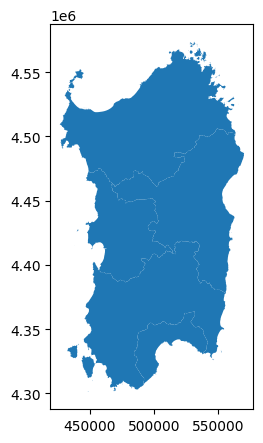

In [13]:
valid_provinces_sardinia.plot(figsize=(5,5))
plt.show()

In [14]:
valid_provinces_sardinia.to_crs(epsg=4326).to_file('../data/processed/provinces_sardinia.geojson', driver='GeoJSON')

We're only interested in the province of Sassari, that includes the two airports of Olbia and Alghero.

Codice Provincia Sassari | 20

In [15]:
sassari = valid_provinces_sardinia[valid_provinces_sardinia['COD_PROV']==90]

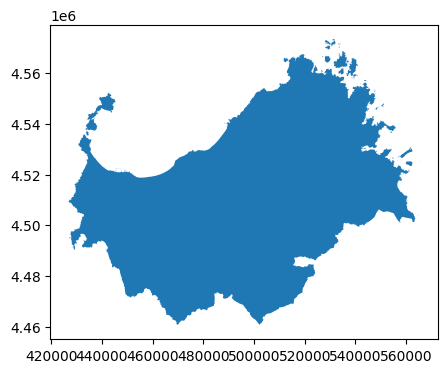

In [16]:
sassari.plot(figsize=(5,5))
plt.show()

In [17]:
sassari.is_valid

89    True
dtype: bool

<center><i>Municipalities</center></i>

In [18]:
# read the file
municipalities = gpd.read_file('../data/raw/Limiti01012023/Com01012023/Com01012023_WGS84.shp')

In [19]:
type(municipalities)

geopandas.geodataframe.GeoDataFrame

In [20]:
municipalities.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'PRO_COM',
       'PRO_COM_T', 'COMUNE', 'COMUNE_A', 'CC_UTS', 'SHAPE_LENG', 'Shape_Le_1',
       'geometry'],
      dtype='object')

In [21]:
municipalities_sardinia = municipalities[municipalities['COD_REG']==20]

In [22]:
print(municipalities_sardinia.shape)
print('')
print(municipalities_sardinia.head())

(377, 13)

      COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  \
2127        5       20       111       0      111   111073    111073   
2128        5       20       111       0      111   111013    111013   
7119        5       20        91       0       91    91090    091090   
7120        5       20        92     292      292    92108    092108   
7121        5       20        90       0       90    90007    090007   

           COMUNE COMUNE_A  CC_UTS    SHAPE_LENG    Shape_Le_1  \
2127      Segariu      NaN       0  21228.531162  21228.359875   
2128  Decimoputzu      NaN       0  32688.280519  32688.015036   
7119         Teti      NaN       0  36056.577630  36056.293848   
7120        Elmas      NaN       0  19642.743080  19642.583252   
7121       Banari      NaN       0  22713.497329  22713.321753   

                                               geometry  
2127  POLYGON ((498451.490 4383062.591, 498472.490 4...  
2128  POLYGON ((490998.550 4356382.807, 491

In [23]:
invalid_geometries_municipalities = municipalities_sardinia[~municipalities_sardinia.geometry.is_valid]
print("Invalid geometries:", invalid_geometries_municipalities)

Invalid geometries:       COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  \
7160        5       20        90       0       90    90035    090035   
7352        5       20       111       0      111   111008    111008   

            COMUNE COMUNE_A  CC_UTS     SHAPE_LENG     Shape_Le_1  \
7160  La Maddalena      NaN       0  230058.643574  230476.324644   
7352     Calasetta      NaN       0   40283.781180   40283.448451   

                                               geometry  
7160  MULTIPOLYGON (((535015.464 4568699.891, 535043...  
7352  POLYGON ((444974.054 4320617.720, 444979.678 4...  


In [24]:
# create a copy of the GeoDataFrame to work on
valid_municipalities_sardinia = municipalities_sardinia.copy()

# apply buffer(0) to fix invalid geometries
valid_municipalities_sardinia.geometry = valid_municipalities_sardinia.geometry.apply(lambda geom: geom.buffer(0))

# check if geometries are now valid
print(valid_municipalities_sardinia.geometry.is_valid.all())

True


In [25]:
valid_municipalities_sardinia.COMUNE

2127                  Segariu
2128              Decimoputzu
7119                     Teti
7120                    Elmas
7121                   Banari
                ...          
7867                  Santadi
7868                   TorpÃ¨
7869    Loiri Porto San Paolo
7870                    Setzu
7871                Esporlatu
Name: COMUNE, Length: 377, dtype: object

In [26]:
valid_municipalities_sardinia.geom_type

2127    Polygon
2128    Polygon
7119    Polygon
7120    Polygon
7121    Polygon
         ...   
7867    Polygon
7868    Polygon
7869    Polygon
7870    Polygon
7871    Polygon
Length: 377, dtype: object

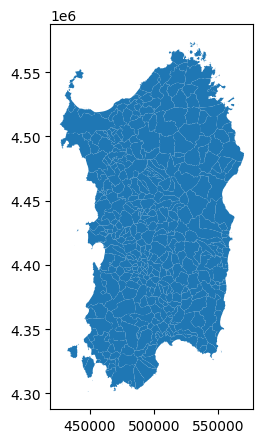

In [27]:
valid_municipalities_sardinia.plot(figsize=(5,5))
plt.show()

In [28]:
municipalities_sassari = valid_municipalities_sardinia[valid_municipalities_sardinia['COD_PROV']==90]

In [29]:
invalid_geometries_municipalities_sassari = municipalities_sassari[~municipalities_sassari.geometry.is_valid]
print("Invalid geometries:", invalid_geometries_municipalities_sassari)

Invalid geometries: Empty GeoDataFrame
Columns: [COD_RIP, COD_REG, COD_PROV, COD_CM, COD_UTS, PRO_COM, PRO_COM_T, COMUNE, COMUNE_A, CC_UTS, SHAPE_LENG, Shape_Le_1, geometry]
Index: []


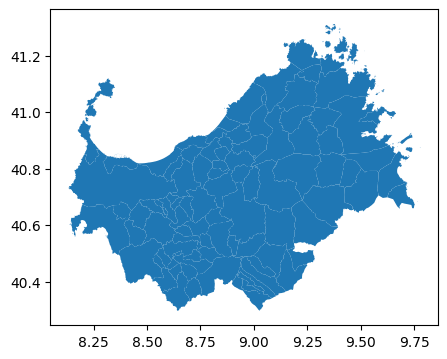

In [35]:
municipalities_sassari.plot(figsize=(5,5))
plt.show()

In [31]:
list_municipalities_sassari = municipalities_sassari.COMUNE.tolist()

In [32]:
municipalities_sassari.to_crs(epsg=4326).to_file('../data/processed/municipalities_sassari.geojson', driver='GeoJSON')

---

**Arrival and Departure Bulletin for Airports and Ports in Sardinia**

In [33]:
# explore arrivals and departures data
arrivals_departures_sardinia = pd.read_csv('../data/raw/bollettino_arrivi_partenze.csv', sep=';')

print(arrivals_departures_sardinia.shape)
print('')
print(arrivals_departures_sardinia.columns)

(12147, 7)

Index(['Data', 'Porto/Aeroporto', 'Nome', 'Arrivi di Linea',
       'Arrivi non di Linea', 'Partenze di Linea', 'Partenze non di Linea'],
      dtype='object')


Il file contiene il dato giornaliero sugli arrivi e le partenze dai porti e dagli aeroporti della Sardegna. La fonte del dato è il sistema PMIS del Comando Generale delle Capitanerie di Porto per i dati relativi ai porti e le società di gestione aeroportuale per quelli relativi agli aeroporti.

- *Data*: la data in formato aaaa-mm-gg
- *Porto/Aeroporto*: indica se la riga si riferisce ad un porto o ad un aeroporto
- *Nome*: il nome del porto o dell'aeroporto
- *Arrivi*: numero di passeggeri arrivati
- *Partenze*: numero di passeggeri partiti
- *Totale*: la somma degli arrivi e delle partenze.

In [34]:
arrivals_departures_sardinia.head()

,Data,Porto/Aeroporto,Nome,Arrivi di Linea,Arrivi non di Linea,Partenze di Linea,Partenze non di Linea
0,2023/08/28,Porto,Olbia,0.0,13388.0,0.0,23239.0
1,2023/08/28,Porto,Cagliari,0.0,2.0,0.0,2221.0
2,2023/08/28,Aeroporto,Cagliari,7433.0,150.0,9280.0,8.0
3,2023/08/27,Porto,Porto Torres,0.0,3211.0,0.0,7464.0
4,2023/08/27,Porto,Olbia,0.0,10623.0,0.0,20170.0


In [35]:
# check for NaN
arrivals_departures_sardinia[arrivals_departures_sardinia.isna().any(axis=1)]

,Data,Porto/Aeroporto,Nome,Arrivi di Linea,Arrivi non di Linea,Partenze di Linea,Partenze non di Linea
12146,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# remove NaN
arrivals_departures_sardinia = arrivals_departures_sardinia.dropna()

In [37]:
arrivals_departures_sardinia.dtypes

Data                      object
Porto/Aeroporto           object
Nome                      object
Arrivi di Linea          float64
Arrivi non di Linea      float64
Partenze di Linea        float64
Partenze non di Linea    float64
dtype: object

In [38]:
arrivals_departures_sardinia['Data'] = pd.to_datetime(arrivals_departures_sardinia['Data'], format='%Y/%m/%d')

In [39]:
# include only Olbia and Alghero's airports and ports
values_to_select = ['Olbia', 'Alghero']
arrivals_departures_sardinia = arrivals_departures_sardinia[arrivals_departures_sardinia['Nome'].isin(values_to_select)]

In [40]:
arrivals_departures_sardinia

,Data,Porto/Aeroporto,Nome,Arrivi di Linea,Arrivi non di Linea,Partenze di Linea,Partenze non di Linea
0,2023-08-28,Porto,Olbia,0.0,13388.0,0.0,23239.0
4,2023-08-27,Porto,Olbia,0.0,10623.0,0.0,20170.0
8,2023-08-27,Aeroporto,Olbia,9610.0,939.0,12841.0,1019.0
10,2023-08-27,Aeroporto,Alghero,2449.0,215.0,3433.0,203.0
12,2023-08-26,Porto,Olbia,0.0,12510.0,0.0,20887.0
...,...,...,...,...,...,...,...
12137,2019-01-02,Aeroporto,Olbia,1159.0,0.0,1509.0,0.0
12139,2019-01-02,Aeroporto,Alghero,1216.0,176.0,1379.0,17.0
12141,2019-01-01,Porto,Olbia,160.0,0.0,2120.0,0.0
12143,2019-01-01,Aeroporto,Olbia,800.0,0.0,1126.0,0.0


In [41]:
# save to csv
arrivals_departures_sardinia.to_csv('../data/processed/arrivals_departures_sardinia.csv', index = False)

In [42]:
ad_airports = arrivals_departures_sardinia[arrivals_departures_sardinia['Porto/Aeroporto'] == 'Aeroporto']
print(ad_airports.shape)
# save to csv
ad_airports.to_csv('../data/processed/ad_airports.csv', index = False)

(3195, 7)


In [43]:
ad_ports = arrivals_departures_sardinia[arrivals_departures_sardinia['Porto/Aeroporto'] == 'Porto']
print(ad_ports.shape)
# save to csv
ad_ports.to_csv('../data/processed/ad_ports.csv', index = False)

(1692, 7)


---

**Passenger flows at Sardinia's airports**

In [44]:
# explore passenger flow data
passenger_flows_airports_sardinia = pd.read_csv('../data/raw/flussi_passeggeri_aeroporti_sardegna.csv')

print(passenger_flows_airports_sardinia.shape)
print('')
print(passenger_flows_airports_sardinia.columns)

(1704, 6)

Index(['Aeroporto', 'Anno', 'Periodo', 'Zona', 'Pass_Arrivo', 'Pass_Partenza'], dtype='object')


Il dataset è ottenuto dall’elaborazione dei giornali di scalo trasmessi alla Regione Sardegna dalle società di
gestione degli aeroporti di Alghero, Cagliari ed Olbia.

Il dataset contiene il numero di passeggeri in arrivo ed in partenza dagli aeroporti della Sardegna aggregati
per aeroporto sardo di origine/destinazione, “zona” geografica di appartenenza dell’aeroporto di
arrivo/partenza e per “periodo” di attività.

Una “zona” è, nel caso di traffico nazionale, l’unione di più regioni italiane; nel caso invece di traffico
internazionale è l’unione di più stati esteri come rappresentati nella tabella “zone”.

Nel caso in cui nel campo “zona” appaia la stringa indicante la somma di più zone (ad esempio “03 + 04”) il
valore dei campi passeggeri in arrivo ed in partenza è da considerarsi come la somma dei passeggeri
originati o destinati alle due zone indicate. Tale assunto è necessario per restituire il dato anche nel caso in
cui in una zona operi un unico vettore con un unico collegamento.

Nel caso in cui tale assunzione non sia comunque efficace per tutelare la riservatezza commerciale del
vettore il dato numerico non verrà pubblicato ma verrà sostituito da un asterisco “*”.

Le statistiche riguardano solo i passeggeri trasportati da voli di linea e charter; non vengono presi in
considerazione altri tipi di traffico come, ad esempio, postali, aerotaxi, aviazione generale.

I periodi sono così suddivisi:

| Nome | Dal           | Al                |
|------|---------------|-------------------|
| W1   | Inizio ora solare<br>(ultima domenica di Ottobre) | 31 Dicembre    |
| W2   | 1 Gennaio     | Fine ora solare<br>(sabato prima dell’ultima domenica di Marzo) |
| S1   | Inizio ora legale<br>(ultima domenica di Marzo)   | 31 Maggio      |
| S2   | 1 Giugno      | 30 Giugno         |
| S3   | 1 Luglio      | 31 Luglio         |
| S4   | 1 Agosto      | 31 Agosto         |
| S5   | 1 Settembre   | Fine ora legale<br>(sabato prima dell’ultima domenica di Ottobre) |

**Passeggeri**

| Campo         | Formato   | Significato                                     |
|---------------|-----------|-------------------------------------------------|
| Aeroporto     | Stringa   | L’aeroporto di riferimento                      |
| Anno          | Stringa   | L’anno di riferimento                          |
| Periodo       | Stringa   | (-> periodo)                                    |
| ID_zona       | Numerico  | (-> zone)                                       |
| Pass_arrivo   | Numerico  | Il totale passeggeri in arrivo                 |
| Pass_partenza | Numerico  | Il totale passeggeri in partenza               |

**Zone**

| Campo    | Formato   | Significato                            |
|----------|-----------|----------------------------------------|
| Paese    | Stringa   | Nome del paese                         |
| Regione  | Stringa   | Nome della regione                     |
| ISO2     | Stringa   | Codice ISO biletterale del paese       |
| ID_zona  | Numerico  | Identificativo zona                    |

In [45]:
passenger_flows_airports_sardinia.head()

,Aeroporto,Anno,Periodo,Zona,Pass_Arrivo,Pass_Partenza
0,Alghero,2023,S1,02,54822,51636
1,Alghero,2023,S1,13 + 14,15010,13877
2,Alghero,2023,S1,03 + 04,44246,43130
3,Alghero,2023,S1,12,11455,9874
4,Alghero,2023,S1,11,7994,7596


In [46]:
# check for NaN
passenger_flows_airports_sardinia[passenger_flows_airports_sardinia.isna().any(axis=1)]

,Aeroporto,Anno,Periodo,Zona,Pass_Arrivo,Pass_Partenza


In [47]:
passenger_flows_airports_sardinia.dtypes

Aeroporto        object
Anno              int64
Periodo          object
Zona             object
Pass_Arrivo       int64
Pass_Partenza     int64
dtype: object

In [48]:
# include only Olbia and Alghero's airports
values_to_select = ['Olbia', 'Alghero']
passenger_flows_airports_sardinia = passenger_flows_airports_sardinia[passenger_flows_airports_sardinia['Aeroporto'].isin(values_to_select)]

In [49]:
# save to csv
passenger_flows_airports_sardinia.to_csv('../data/processed/passenger_flows_airports_sardinia.csv', index = False)

**Origin and Destination Zones of Passengers**

In [50]:
# explore passenger zones data
passengers_zones = pd.read_csv('../data/raw/zone_provenienza_destinazione_passeggeri.csv')

print(passengers_zones.shape)
print('')
print(passengers_zones.columns)

(37, 4)

Index(['Paese', 'ISO2', 'regione', 'ID_zona'], dtype='object')


In [51]:
passengers_zones.head()

,Paese,ISO2,regione,ID_zona
0,Italia,IT,Sardegna,1
1,Italia,IT,Friuli-Venezia Giulia,2
2,Italia,IT,Liguria,2
3,Italia,IT,Lombardia,2
4,Italia,IT,Piemonte,2


In [52]:
# check for NaN
passengers_zones[passengers_zones.isna().any(axis=1)]

,Paese,ISO2,regione,ID_zona


In [53]:
passengers_zones.dtypes

Paese      object
ISO2       object
regione    object
ID_zona     int64
dtype: object

In [54]:
# save to csv
passengers_zones.to_csv('../data/processed/passengers_zones.csv', index = False)

---

**Public Transports Sardinia**

In [55]:
# explore public transports data
stops_sardinia = pd.read_csv('../data/raw/fermate_sardegna.csv', sep = ';')

print(stops_sardinia.shape)
print('')
print(stops_sardinia.columns)

(7498, 9)

Index(['stop_id', 'stop_code', 'stop_name', 'stop_desc', 'stop_lat',
       'stop_lon', 'stop_comune', 'wheelchair_boarding', 'stop_type'],
      dtype='object')


In [56]:
stops_sardinia.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_comune,wheelchair_boarding,stop_type
0,IM0099,0099,Fermata di Is Mirrionis (Ospedale),NaN,39.236159,9.107707,CAGLIARI,0.0,Fermata Autobus
1,ATPSS_455,455,Fermata di Via De Cupis 32,NaN,40.761698,8.500294,SASSARI,NaN,Fermata Autobus
2,B_4777,4777,Fermata di VIA SARTIGLIA ANG GR.CONTADINI,NaN,39.890200,8.602400,ORISTANO,NaN,Fermata Autobus
3,ASPO1051,ASPO1051,Fermata di 1051 - Colcò agraria,NaN,40.905960,9.501480,OLBIA,NaN,Fermata Autobus
4,B_1514,1514,Fermata di SS 126 SA STROVINA,NaN,39.509172,8.555325,ARBUS,NaN,Fermata Autobus


Remove wheelchair_boarding, stop_code, and stop_desc because of lack of information.

In [57]:
stops_sardinia = stops_sardinia[['stop_id', 'stop_name', 'stop_lat',
       'stop_lon', 'stop_comune', 'stop_type']]

In [58]:
# check for NaN
stops_sardinia[stops_sardinia.isna().any(axis=1)]

,stop_id,stop_name,stop_lat,stop_lon,stop_comune,stop_type


In [59]:
stops_sardinia.dtypes

stop_id         object
stop_name       object
stop_lat       float64
stop_lon       float64
stop_comune     object
stop_type       object
dtype: object

In [60]:
list_municipalities_sassari

['Banari',
 'Burgos',
 'Padria',
 'Monteleone Rocca Doria',
 'Cossoine',
 'Santa Maria Coghinas',
 'Laerru',
 'Ozieri',
 'La Maddalena',
 'Bulzi',
 'Alghero',
 'Telti',
 'Golfo Aranci',
 "Sant'Antonio di Gallura",
 'Nulvi',
 'Uri',
 'Benetutti',
 'Budoni',
 'Bultei',
 'Villanova Monteleone',
 'Pozzomaggiore',
 'Sassari',
 'Tergu',
 'Olbia',
 'Stintino',
 'Florinas',
 'Badesi',
 'Semestene',
 'Palau',
 'Muros',
 'Valledoria',
 'Tempio Pausania',
 'Aglientu',
 'Tula',
 'Borutta',
 'Santa Teresa Gallura',
 'Sedini',
 'Giave',
 'Ardara',
 'Martis',
 'Osilo',
 'Viddalba',
 'Monti',
 'Torralba',
 'Erula',
 'Thiesi',
 'Mores',
 'Bessude',
 'Berchidda',
 'Chiaramonti',
 'Sorso',
 'Ittiri',
 'Cheremule',
 'Usini',
 'Putifigari',
 'Arzachena',
 'San Teodoro',
 'Ossi',
 'Calangianus',
 'Nughedu San NicolÃ²',
 'AlÃ\xa0 dei Sardi',
 'Aggius',
 'Bortigiadas',
 'Nule',
 'Codrongianos',
 'Porto Torres',
 'Tissi',
 'Olmedo',
 'Bonorva',
 'Padru',
 'Bono',
 'Anela',
 'Oschiri',
 'Luogosanto',
 'Pattada'

In [61]:
uppercase_list_municipalities_sassari = [item.upper() for item in list_municipalities_sassari]

In [62]:
# select only stops in Sassari
stops_sassari = stops_sardinia[stops_sardinia['stop_comune'].isin(uppercase_list_municipalities_sassari)]

In [63]:
# save to csv
stops_sassari.to_csv('../data/processed/stops_sassari.csv', index = False)

---

**Resident population in Sardinia**

In [64]:
# explore population data
population_sassari = pd.read_csv('../data/raw/popolazione_residente_sassari-2023.csv', sep=';')

print(population_sassari.shape)
print('')
print(population_sassari.columns)

(92, 2)

Index(['Comune', 'Popolazione'], dtype='object')


In [65]:
population_sassari.head()

,Comune,Popolazione
0,Aggius,1403
1,Aglientu,1169
2,Alà dei Sardi,1760
3,Alghero,42380
4,Anela,567


In [66]:
# check for NaN
population_sassari[population_sassari.isna().any(axis=1)]

,Comune,Popolazione


In [67]:
population_sassari.dtypes

Comune         object
Popolazione     int64
dtype: object

In [68]:
# save to csv
population_sassari.to_csv('../data/processed/population_sassari.csv', index = False)

---

**Tourism in Sardinia**

In [69]:
# explore movements by municipality data
movements_2022 = pd.read_csv('../data/raw/turismo/csv_opendata_comuni_mesi_tipologie_2022.csv')

print(movements_2022.shape)
print('')
print(movements_2022.columns)

(75448, 8)

Index(['anno', 'provincia', 'comune', 'mese', 'macro_tipologia', 'provenienza',
       'arrivi', 'presenze'],
      dtype='object')


Nel dettaglio, vengono pubblicati i dati mensili su arrivi e presenze dell'anno 2022, suddivisi per macro-tipologia e mercato di riferimento, con disaggregazione comunale.

In [70]:
movements_2022.head()

,anno,provincia,comune,mese,macro_tipologia,provenienza,arrivi,presenze
0,2022,Città metropolitana Cagliari,ASSEMINI,1,Non disponibile,Francia,2.0,14
1,2022,Città metropolitana Cagliari,ASSEMINI,1,Non disponibile,Paesi Bassi,9.0,109
2,2022,Città metropolitana Cagliari,ASSEMINI,1,Non disponibile,Germania,4.0,25
3,2022,Città metropolitana Cagliari,ASSEMINI,1,Non disponibile,Regno Unito,NaN,13
4,2022,Città metropolitana Cagliari,ASSEMINI,1,Non disponibile,Spagna,1.0,1


In [71]:
# check for NaN
movements_2022[movements_2022.isna().any(axis=1)]

,anno,provincia,comune,mese,macro_tipologia,provenienza,arrivi,presenze
3,2022,Città metropolitana Cagliari,ASSEMINI,1,Non disponibile,Regno Unito,NaN,13
94,2022,Città metropolitana Cagliari,ASSEMINI,11,Non disponibile,Basilicata,NaN,25
100,2022,Città metropolitana Cagliari,ASSEMINI,12,Non disponibile,Francia,NaN,1
110,2022,Città metropolitana Cagliari,ASSEMINI,12,Non disponibile,Slovacchia,NaN,1
114,2022,Città metropolitana Cagliari,ASSEMINI,12,Non disponibile,Slovenia,NaN,4
...,...,...,...,...,...,...,...,...
75344,2022,Provincia di Sassari,VILLANOVA MONTELEONE,6,Non disponibile,Paesi Bassi,NaN,30
75380,2022,Provincia di Sassari,VILLANOVA MONTELEONE,8,Extra-Alberghiero - Complementari,Regno Unito,NaN,50
75445,2022,NaN,Non disponibile,Non disponibile,Non disponibile,Spagna,1.0,6
75446,2022,NaN,Non disponibile,Non disponibile,Non disponibile,Lombardia,1.0,7


In [72]:
movements_2022.dtypes

anno                 int64
provincia           object
comune              object
mese                object
macro_tipologia     object
provenienza         object
arrivi             float64
presenze             int64
dtype: object

In [73]:
# include only 'Provincia di Sassari'
values_to_select = ['Provincia di Sassari']
movements_2022 = movements_2022[movements_2022['provincia'].isin(values_to_select)]

In [74]:
movements_2022

,anno,provincia,comune,mese,macro_tipologia,provenienza,arrivi,presenze
50750,2022,Provincia di Sassari,AGGIUS,7,Non disponibile,Francia,23.0,35
50751,2022,Provincia di Sassari,AGGIUS,7,Non disponibile,Paesi Bassi,2.0,4
50752,2022,Provincia di Sassari,AGGIUS,7,Non disponibile,Germania,12.0,20
50753,2022,Provincia di Sassari,AGGIUS,7,Non disponibile,Regno Unito,6.0,30
50754,2022,Provincia di Sassari,AGGIUS,7,Non disponibile,Danimarca,2.0,2
...,...,...,...,...,...,...,...,...
75440,2022,Provincia di Sassari,VILLANOVA MONTELEONE,Non disponibile,Non disponibile,Regno Unito,2.0,8
75441,2022,Provincia di Sassari,VILLANOVA MONTELEONE,Non disponibile,Non disponibile,Svizzera (incluso Liechtenstein),3.0,13
75442,2022,Provincia di Sassari,VILLANOVA MONTELEONE,Non disponibile,Non disponibile,Emilia Romagna,3.0,5
75443,2022,Provincia di Sassari,VILLANOVA MONTELEONE,Non disponibile,Non disponibile,Campania,5.0,130


Merge all data from 2022 to 2018

In [75]:
'''
# create an empty list to hold DataFrames for each year
data_frames = []

# loop through the years from 2022 to 2019 (reversed order)
for year in range(2022, 2018, -1):
    # construct the filename for the current year
    filename = f"../data/raw/turismo/csv_opendata_comuni_mesi_tipologie_{year}.csv"
    
    # read the dataset for the current year
    current_data_movements = pd.read_csv(filename)
    
    # append the current year's data DataFrame to the list
    data_frames.append(current_data_movements)

# concatenate all DataFrames in the list into a single DataFrame
concatenated_data_movements = pd.concat(data_frames, ignore_index=True)

# print the first few rows of the concatenated data
print(concatenated_data_movements.head())
'''

'\n# create an empty list to hold DataFrames for each year\ndata_frames = []\n\n# loop through the years from 2022 to 2019 (reversed order)\nfor year in range(2022, 2018, -1):\n    # construct the filename for the current year\n    filename = f"../data/raw/turismo/csv_opendata_comuni_mesi_tipologie_{year}.csv"\n    \n    # read the dataset for the current year\n    current_data_movements = pd.read_csv(filename)\n    \n    # append the current year\'s data DataFrame to the list\n    data_frames.append(current_data_movements)\n\n# concatenate all DataFrames in the list into a single DataFrame\nconcatenated_data_movements = pd.concat(data_frames, ignore_index=True)\n\n# print the first few rows of the concatenated data\nprint(concatenated_data_movements.head())\n'

In [76]:
# save to csv
# concatenated_data_movements.to_csv('../data/processed/concatenated_data_movements.csv', index = False)

In [77]:
# explore structures data
structures_2022 = pd.read_csv('../data/raw/turismo/capacita_strutture_ricettive_mensile_2022.csv')

print(structures_2022.shape)
print('')
print(structures_2022.columns)

(16947, 9)

Index(['anno', 'Provincia', 'comune', 'mese', 'descrizione', 'Stelle',
       'numero strutture', 'letti', 'camere'],
      dtype='object')


Questo dataset contiene la capacità delle strutture ricettive riferita all'anno 2022.

La capacità ricettiva misura la consistenza in termini di numero delle strutture ricettive e relativi posti letto e camere.

I dati sono suddivisi per comune, mese e tipologia e categoria di struttura.

La fonte del dato è l'anagrafica del SIRED, il sistema informativo di raccolta ed elaborazione dati fornito dalla Regione Sardegna. Il SIRED contiene i periodi di apertura delle strutture ricettive così come da queste comunicati. Sono comprese nel conteggio tutte le strutture (e relativi posti letto e camere) che risultano aperte in un dato mese e le strutture che, pur avendo comunicato di essere chiuse in quel mese, hanno comunque comunicato attraverso il SIRED la presenza di almeno un ospite.

In [78]:
structures_2022.head()

,anno,Provincia,comune,mese,descrizione,Stelle,numero strutture,letti,camere
0,2022,Provincia di Oristano,ABBASANTA,1,Agriturismo,NaN,1,10,6
1,2022,Provincia di Oristano,ABBASANTA,1,Albergo,4 Stelle,1,25,10
2,2022,Provincia di Oristano,ABBASANTA,1,Bed and breakfast,2 Stelle,1,4,2
3,2022,Provincia di Oristano,ABBASANTA,2,Agriturismo,NaN,1,10,6
4,2022,Provincia di Oristano,ABBASANTA,2,Albergo,3 Stelle,1,91,31


In [79]:
# check for NaN
structures_2022[structures_2022.isna().any(axis=1)]

,anno,Provincia,comune,mese,descrizione,Stelle,numero strutture,letti,camere
0,2022,Provincia di Oristano,ABBASANTA,1,Agriturismo,NaN,1,10,6
3,2022,Provincia di Oristano,ABBASANTA,2,Agriturismo,NaN,1,10,6
7,2022,Provincia di Oristano,ABBASANTA,3,Agriturismo,NaN,1,10,6
11,2022,Provincia di Oristano,ABBASANTA,4,Agriturismo,NaN,1,10,6
15,2022,Provincia di Oristano,ABBASANTA,5,Agriturismo,NaN,1,10,6
...,...,...,...,...,...,...,...,...,...
16942,2022,Provincia di Oristano,ZERFALIU,10,Alloggi privati,NaN,1,7,3
16943,2022,Provincia di Oristano,ZERFALIU,11,Agriturismo,NaN,1,16,6
16944,2022,Provincia di Oristano,ZERFALIU,11,Alloggi privati,NaN,1,7,3
16945,2022,Provincia di Oristano,ZERFALIU,12,Agriturismo,NaN,1,16,6


In [80]:
# remove NaN
# structures_2022 = structures_2022.dropna()

In [81]:
structures_2022.dtypes

anno                 int64
Provincia           object
comune              object
mese                 int64
descrizione         object
Stelle              object
numero strutture     int64
letti                int64
camere               int64
dtype: object

In [82]:
# include only 'Provincia di Sassari'
values_to_select = ['Provincia di Sassari']
structures_2022 = structures_2022[structures_2022['Provincia'].isin(values_to_select)]

In [83]:
structures_2022

,anno,Provincia,comune,mese,descrizione,Stelle,numero strutture,letti,camere
47,2022,Provincia di Sassari,AGGIUS,1,Alloggi privati,NaN,2,10,6
48,2022,Provincia di Sassari,AGGIUS,2,Agriturismo,NaN,1,20,13
49,2022,Provincia di Sassari,AGGIUS,2,Alloggi privati,NaN,2,10,6
50,2022,Provincia di Sassari,AGGIUS,3,Agriturismo,NaN,1,20,13
51,2022,Provincia di Sassari,AGGIUS,3,Alloggi privati,NaN,2,10,6
...,...,...,...,...,...,...,...,...,...
16486,2022,Provincia di Sassari,VILLANOVA MONTELEONE,12,Affittacamere,NaN,1,0,0
16487,2022,Provincia di Sassari,VILLANOVA MONTELEONE,12,Affittacamere,II Categoria,1,7,4
16488,2022,Provincia di Sassari,VILLANOVA MONTELEONE,12,Agriturismo,NaN,1,6,3
16489,2022,Provincia di Sassari,VILLANOVA MONTELEONE,12,Alloggi privati,NaN,2,8,3


Merge all data from 2022 to 2018

In [84]:
'''
# create an empty list to hold DataFrames for each year
data_frames = []

# loop through the years from 2022 to 2019 (reversed order)
for year in range(2022, 2018, -1):
    # construct the filename for the current year
    filename = f"../data/raw/turismo/capacita_strutture_ricettive_mensile_{year}.csv"
    
    # read the dataset for the current year
    current_data_structures = pd.read_csv(filename)
    
    # append the current year's data DataFrame to the list
    data_frames.append(current_data_structures)

# concatenate all DataFrames in the list into a single DataFrame
concatenated_data_structures = pd.concat(data_frames, ignore_index=True)

# print the first few rows of the concatenated data
print(concatenated_data_structures.head())
'''

'\n# create an empty list to hold DataFrames for each year\ndata_frames = []\n\n# loop through the years from 2022 to 2019 (reversed order)\nfor year in range(2022, 2018, -1):\n    # construct the filename for the current year\n    filename = f"../data/raw/turismo/capacita_strutture_ricettive_mensile_{year}.csv"\n    \n    # read the dataset for the current year\n    current_data_structures = pd.read_csv(filename)\n    \n    # append the current year\'s data DataFrame to the list\n    data_frames.append(current_data_structures)\n\n# concatenate all DataFrames in the list into a single DataFrame\nconcatenated_data_structures = pd.concat(data_frames, ignore_index=True)\n\n# print the first few rows of the concatenated data\nprint(concatenated_data_structures.head())\n'

In [85]:
# save to csv
# concatenated_data_structures.to_csv('../data/processed/concatenated_data_structures.csv', index = False)

---

**Beach Systems of Sardinia**

In [86]:
# explore beach_systems data
beach_systems = gpd.read_file('../data/raw/sistemi_spiaggia/CAMPI_DUNARI_SIST_SPIAGGIA.shp')

print(beach_systems.shape)
print('')
print(beach_systems.columns)

(330, 4)

Index(['idFeature', 'tipoElCod', 'tipoElDesc', 'geometry'], dtype='object')


PPR Assetto Ambientale - Beni paesaggistici ex art. 143 D.Lgs 42/04 e succ. mod.
Elementi poligonali rappresentanti aree caratterizzate da morfologie costiere. Questi elementi appartengono a quelle tipologie naturali di paesaggio individuate nella fascia costiera e nella zona di transizione tipizzate e sottoposte a tutela dal Piano Paesaggistico (Art. 17 comma 3 lettere b e c delle N.T.A. PPR).
Comprendono:
- CAMPI DUNARI
- SISTEMI DI SPIAGGIA.

In [87]:
beach_systems.head()

,idFeature,tipoElCod,tipoElDesc,geometry
0,11,1,Campi dunari,"POLYGON ((1568989.664 4487711.000, 1568997.500..."
1,13,6,Sistemi di spiaggia,"POLYGON ((1536633.808 4553944.595, 1536617.981..."
2,15,6,Sistemi di spiaggia,"POLYGON ((1524692.652 4340574.869, 1524744.634..."
3,16,6,Sistemi di spiaggia,"POLYGON ((1525876.907 4340330.435, 1525875.125..."
4,17,6,Sistemi di spiaggia,"POLYGON ((1528396.819 4559857.345, 1528395.943..."


In [88]:
# check for NaN
beach_systems[beach_systems.isna().any(axis=1)]

,idFeature,tipoElCod,tipoElDesc,geometry


In [89]:
beach_systems.dtypes

idFeature        int64
tipoElCod        int64
tipoElDesc      object
geometry      geometry
dtype: object

In [90]:
beach_systems['tipoElCod'].unique()

array([1, 6], dtype=int64)

In [91]:
beach_systems['tipoElDesc'].unique()

array(['Campi dunari', 'Sistemi di spiaggia'], dtype=object)

In [92]:
# include only 'Sistemi di spiaggia'
values_to_select = ['Sistemi di spiaggia']
beach_systems = beach_systems[beach_systems['tipoElDesc'].isin(values_to_select)]

In [93]:
beach_systems

,idFeature,tipoElCod,tipoElDesc,geometry
1,13,6,Sistemi di spiaggia,"POLYGON ((1536633.808 4553944.595, 1536617.981..."
2,15,6,Sistemi di spiaggia,"POLYGON ((1524692.652 4340574.869, 1524744.634..."
3,16,6,Sistemi di spiaggia,"POLYGON ((1525876.907 4340330.435, 1525875.125..."
4,17,6,Sistemi di spiaggia,"POLYGON ((1528396.819 4559857.345, 1528395.943..."
5,18,6,Sistemi di spiaggia,"POLYGON ((1531579.585 4336474.797, 1531584.768..."
...,...,...,...,...
324,3348,6,Sistemi di spiaggia,"POLYGON ((1551603.693 4354632.788, 1551689.359..."
325,3432,6,Sistemi di spiaggia,"POLYGON ((1514397.769 4558427.081, 1514391.198..."
326,3434,6,Sistemi di spiaggia,"POLYGON ((1533342.886 4565649.959, 1533351.250..."
327,2732,6,Sistemi di spiaggia,"POLYGON ((1471128.024 4307202.065, 1471129.245..."


In [94]:
# set the proper coordinate reference system (CRS) for visualization (EPSG:4326)
beach_systems = beach_systems.to_crs(epsg=4326)

In [95]:
# save to csv
beach_systems.to_csv('../data/processed/beach_systems.csv', index = False)